In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
raw_dataset = pd.read_csv("Fish Data - A2.csv")
raw_dataset

,Height,Width,Weight
0,11.5200,4.0200,242.0
1,12.4800,4.3056,290.0
2,12.3778,4.6961,340.0
3,12.7300,4.4555,363.0
4,12.4440,5.1340,430.0
...,...,...,...
154,2.0904,1.3936,12.2
155,2.4300,1.2690,13.4
156,2.2770,1.2558,12.2
157,2.8728,2.0672,19.7


In [161]:
dataset = raw_dataset.copy()
dataset['Height'] = (dataset['Height'] - dataset['Height'].mean())/dataset['Height'].std()
dataset['Width'] = (dataset['Width'] - dataset['Width'].mean())/dataset['Width'].std()
dataset['Weight'] = dataset['Weight']/1000

In [162]:
train_dataset = dataset.sample(frac=0.8)
train_dataset

,Height,Width,Weight
151,-1.576474,-1.858867,0.0100
50,-0.367270,-0.172194,0.2000
100,-0.562267,-0.105876,0.1970
91,-0.726748,-0.470687,0.1300
42,-0.666415,-0.666261,0.1200
...,...,...,...
30,2.115135,1.120424,0.9200
146,-1.632911,-1.932304,0.0075
139,-0.301197,0.568580,0.7700
87,-0.777142,-0.529412,0.1200


In [163]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset

,Height,Width,Weight
3,0.877001,0.022550,0.3630
12,1.117120,-0.029354,0.5000
19,1.283840,0.777145,0.6500
23,1.515934,1.016200,0.6800
24,1.696023,0.694929,0.7000
25,1.723903,0.970288,0.7250
32,2.282485,1.383444,0.9250
38,-0.782602,-0.737266,0.0870
41,-0.654027,-0.606112,0.1100
46,-0.564834,-0.648050,0.1400


In [164]:
train_data = train_dataset.to_numpy()
test_data = test_dataset.to_numpy()

In [165]:
def polynomial(x, y, deg):
    input_vector = [1]
    for i in range(1, deg+1):
        for j in range(i+1):
            input_vector.append((x**(i-j))*(y**j))

    return np.array(input_vector)

In [166]:
def error(data, w, deg):
    sum = 0
    for example in data:
        x = polynomial(example[0], example[1], deg)
        y = example[2]
        h = w.dot(x)
        sum += ((h-y)**2)

    return sum/(2*len(data))

In [167]:
def batch_grad(data, w, deg):
    sum = np.zeros(len(w))
    for example in data:
        x = polynomial(example[0], example[1], deg)
        y = example[2]
        h = w.dot(x)
        sum += (y - h)*x

    return sum

def learn_batch(train_data, test_data, deg, epochs, lr):
    w = np.zeros(len(polynomial(0, 0, deg)))
    train_errs = [error(train_data, w, deg)]
    test_errs = [error(test_data, w, deg)]

    for i in range(epochs):
        w += lr*batch_grad(train_data, w, deg) 
        train_errs.append(error(train_data, w, deg))
        test_errs.append(error(test_data, w, deg))
    
    return w, np.array(train_errs), np.array(test_errs)

In [168]:
def learn_stoch(train_data, test_data, deg, epochs, lr):
    w = np.zeros(len(polynomial(0, 0, deg)))
    train_errs = [error(train_data, w, deg)]
    test_errs = [error(test_data, w, deg)]

    for i in range(epochs):
        example = train_data[i%(len(train_data))]
        x = polynomial(example[0], example[1], deg)
        h = w.dot(x)
        y = example[2]

        w += lr*(y-h)*x
        train_errs.append(error(train_data, w, deg))
        test_errs.append(error(test_data, w, deg))
    
    return w, np.array(train_errs), np.array(test_errs)
    

In [169]:
def plot_surface(w, degree):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate the polynomial values Z
    w_out = w
    Z = np.zeros_like(X)
    for z in range(degree + 1):
        for j in range(degree + 1 - z):
            Z += w_out[z + j] * (X**z) * (Y**j)

        # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

        # Plot the surface graph
    ax.plot_surface(X, Y, Z, cmap='viridis')

        # Customize the plot
    q = 2
    lamda = 1
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')
    ax.set_title(f"Plot for degree {degree}")
    ax.view_init(elev=10, azim=50)  # Adjust the viewing angle

        # Display the plot
    plt.show()

In [170]:
def stoch_polynomial_regression(train_data, test_data, n_epochs, learning_rate):
    w = np.empty(9)
    train_errs = np.empty((9, n_epochs+1))
    test_errs = np.empty((9, n_epochs+1))
    final_train_errs = np.empty(9)
    final_test_errs = np.empty(9)

    for deg in range(1, 10):
        w, train_errs[deg-1], test_errs[deg-1] = learn_stoch(train_data, test_data, deg, epochs=n_epochs, lr=learning_rate)
        final_train_errs[deg-1] = train_errs[deg-1][-1]
        final_test_errs[deg-1] = test_errs[deg-1][-1]
        plot_surface(w, deg)
        
    
    return train_errs, test_errs, final_train_errs, final_test_errs

In [171]:
def batch_polynomial_regression(train_data, test_data, n_epochs, learning_rate):
    w = np.empty(9)
    train_errs = np.empty((9, n_epochs+1))
    test_errs = np.empty((9, n_epochs+1))
    final_train_errs = np.empty(9)
    final_test_errs = np.empty(9)

    for deg in range(1, 10):
        w, train_errs[deg-1], test_errs[deg-1] = learn_batch(train_data, test_data, deg, epochs=n_epochs, lr=learning_rate)
        final_train_errs[deg-1] = train_errs[deg-1][-1]
        final_test_errs[deg-1] = test_errs[deg-1][-1]
        plot_surface(w, deg)
        
    
    return train_errs, test_errs, final_train_errs, final_test_errs

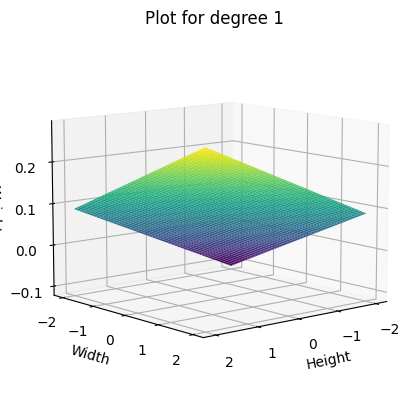

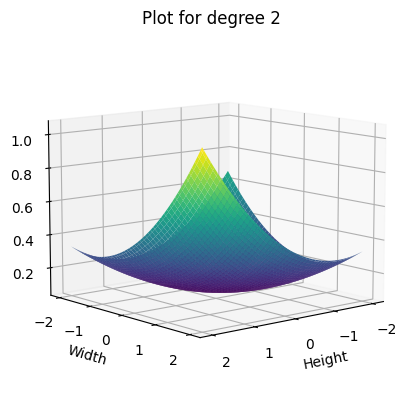

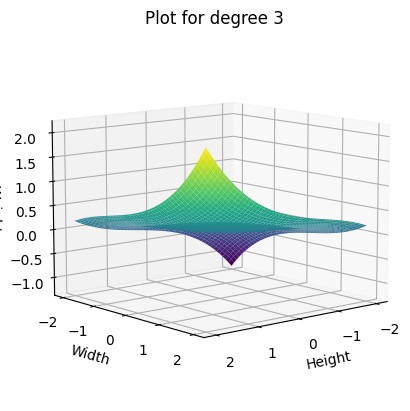

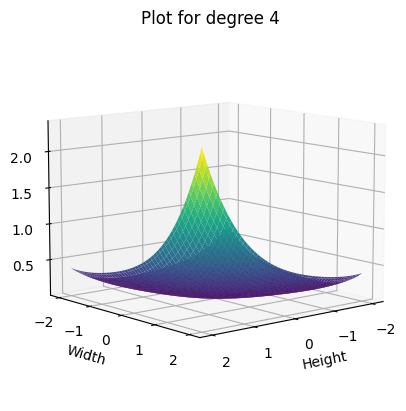

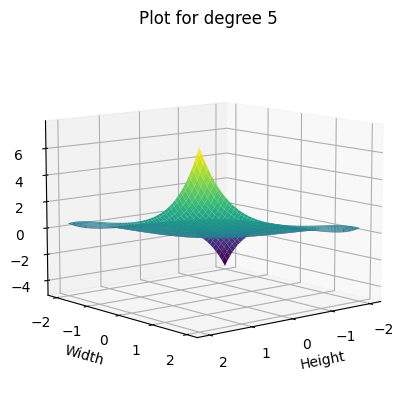

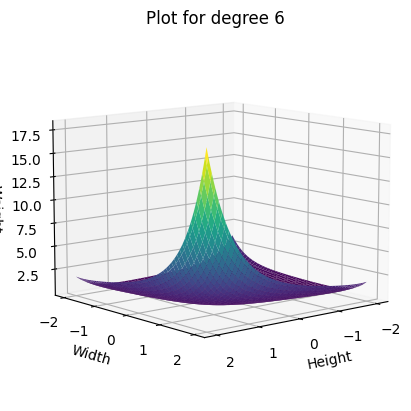

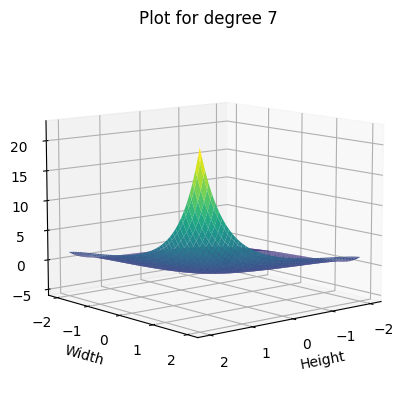

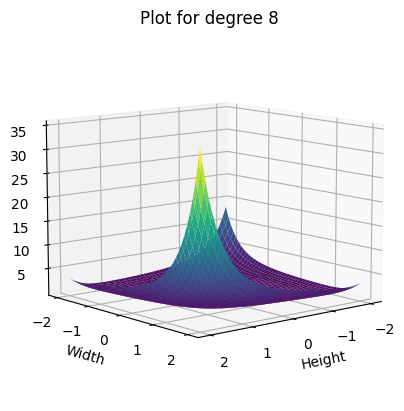

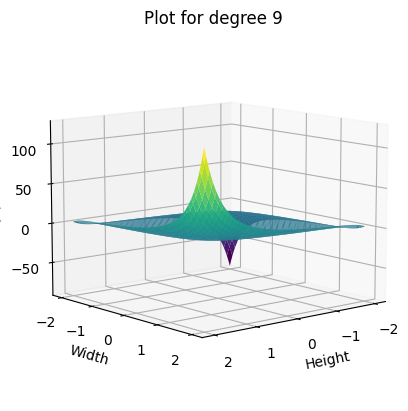

In [172]:
train_errs, test_errs, final_train_errs, final_test_errs = batch_polynomial_regression(train_data, test_data, n_epochs=20000, learning_rate=0.0000001)

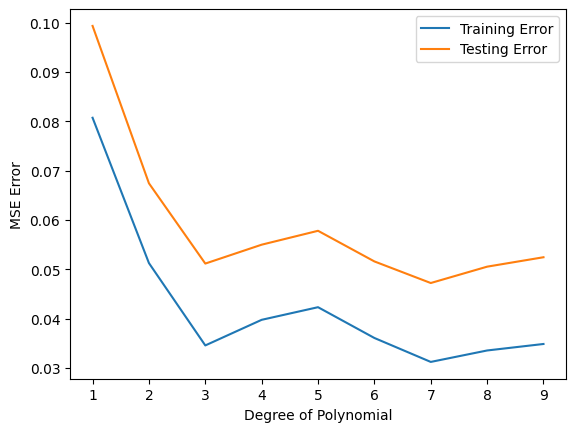

In [173]:
plt.plot(range(1, 10), final_train_errs, label='Training Error')
plt.plot(range(1, 10), final_test_errs, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE Error')
plt.legend()
plt.show()

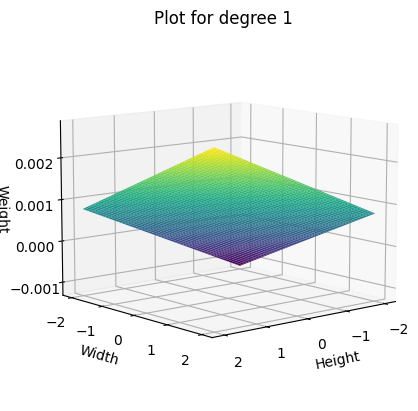

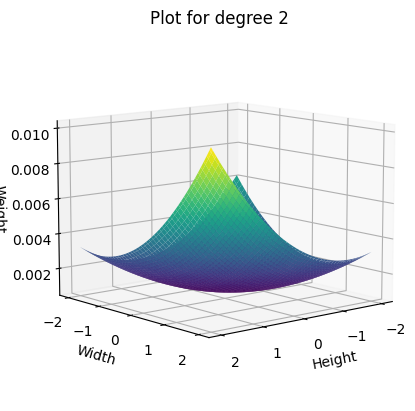

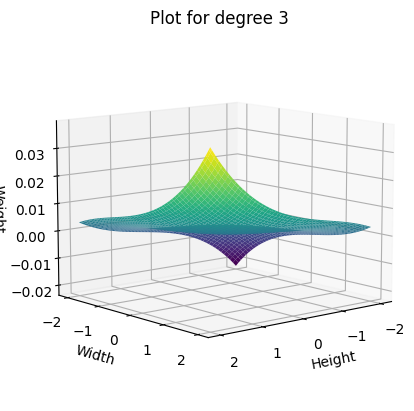

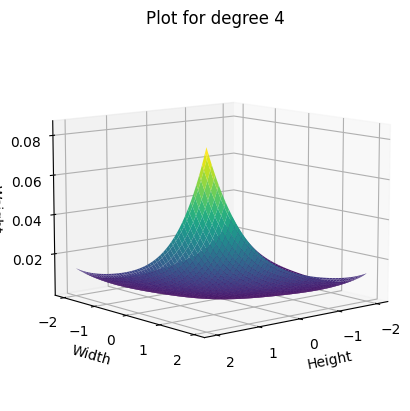

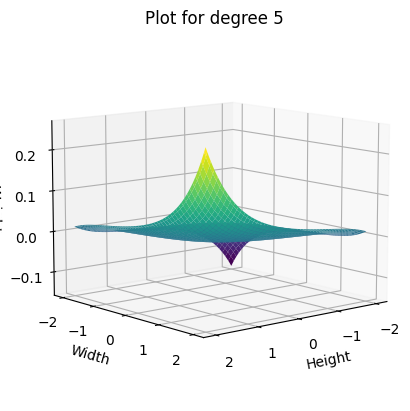

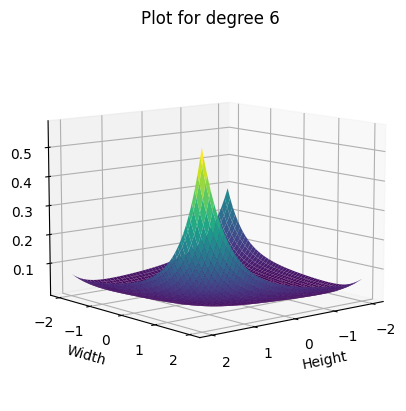

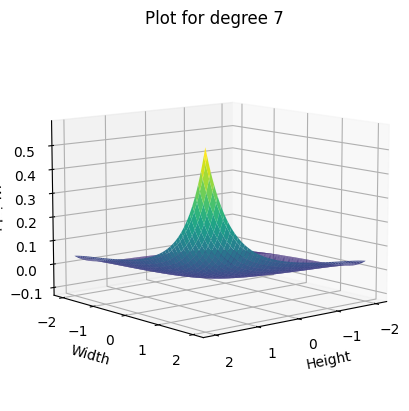

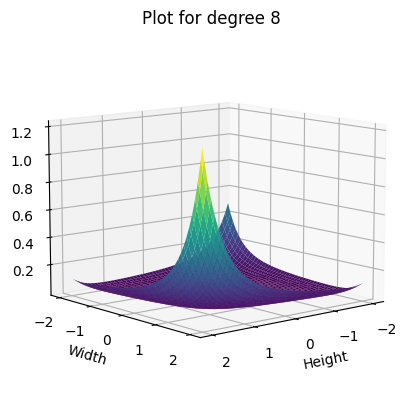

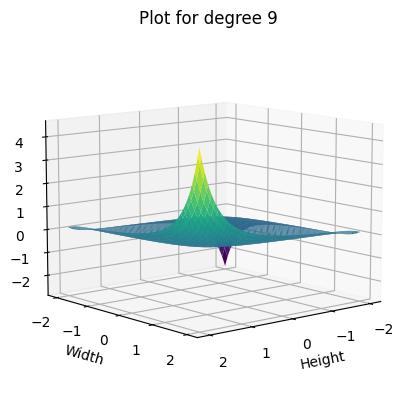

In [174]:
train_errs, test_errs, final_train_errs, final_test_errs = stoch_polynomial_regression(train_data, test_data, n_epochs=20000, learning_rate=0.0000001)

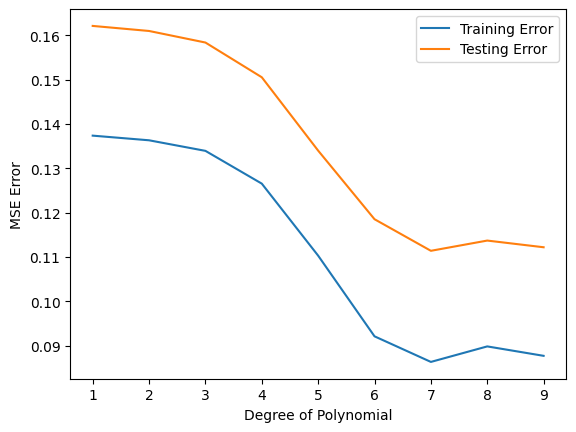

In [175]:
plt.plot(range(1, 10), final_train_errs, label='Training Error')
plt.plot(range(1, 10), final_test_errs, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE Error')
plt.legend()
plt.show()

In [176]:
def reg_error(data, w, deg, lmd, q):
    sum = 0
    for example in data:
        x = polynomial(example[0], example[1], deg)
        y = example[2]
        h = w.dot(x)
        sum += ((h-y)**2)

    return sum/(2*len(data)) + np.sum(lmd*0.5*(w**q))

def regularize(w, lmd, q):
    if q==0.5:
        reg = 0.5*(np.abs(w)**(-0.5))*np.sign(w)

    elif q==1:
        reg = np.sign(w)
    
    elif q==2:
        reg = 2*w

    else:
        reg = 4*(w**3)
    
    return lmd*0.5*reg

def reg_batch_grad(data, w, deg, lmd, q):
    sum = np.zeros(len(w))
    for example in data:
        x = polynomial(example[0], example[1], deg)
        y = example[2]
        h = w.dot(x)
        sum += (y - h)*x

    return sum - regularize(w, lmd, q)

In [177]:
def learn_reg_batch(train_data, test_data, deg, epochs, lr, lmd, q):
    w = np.full((len(polynomial(0, 0, deg)),), 0.00000001)
    train_errs = [error(train_data, w, deg)]
    test_errs = [error(test_data, w, deg)]

    for i in range(epochs):
        w += lr*reg_batch_grad(train_data, w, deg, lmd, q) 
        train_errs.append(reg_error(train_data, w, deg, lmd, deg))
        test_errs.append(error(test_data, w, deg))
    
    return w, np.array(train_errs), np.array(test_errs)

In [ ]:
q_list=[0.5,1,2,4]
lamda_list = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for q in q_list:
    final_train_errs = []
    final_test_errs = []
    for l in lamda_list:
        w, train_errors, test_errors = learn_reg_batch(train_data, test_data, 7, 1000, 0.000001, l, q)
        final_train_errs.append(train_errors[-1])
        final_test_errs.append(test_errors[-1])
        print(train_errors[-1])
        print(test_errors[-1])


        

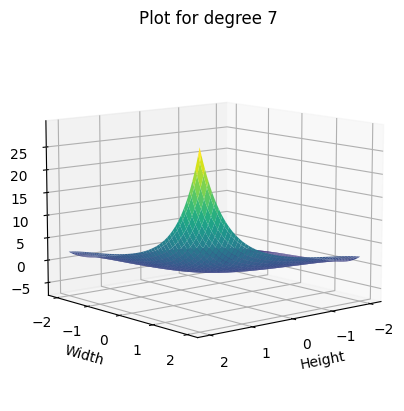

In [190]:
w, train_errs, test_errs = learn_reg_batch(train_data, test_data, 7, 10000, 0.000001, 0.01, 0.5)
plot_surface(w, 7)

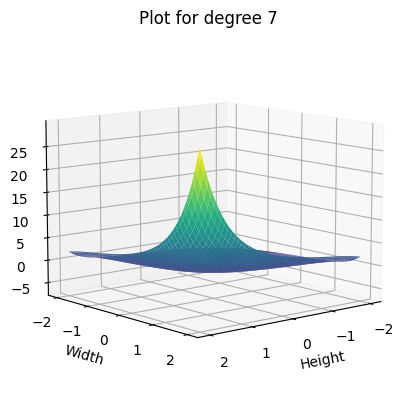

In [192]:
w, train_errs, test_errs = learn_reg_batch(train_data, test_data, 7, 10000, 0.000001, 0.1, 1)
plot_surface(w, 7)

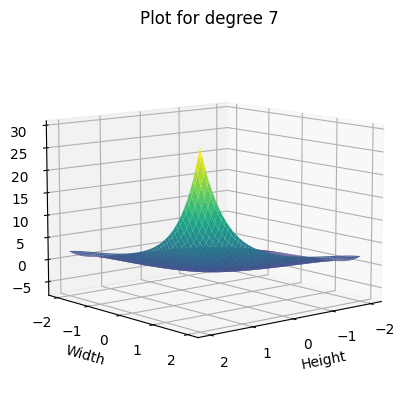

In [193]:
w, train_errs, test_errs = learn_reg_batch(train_data, test_data, 7, 10000, 0.000001, 0.3, 2)
plot_surface(w, 7)

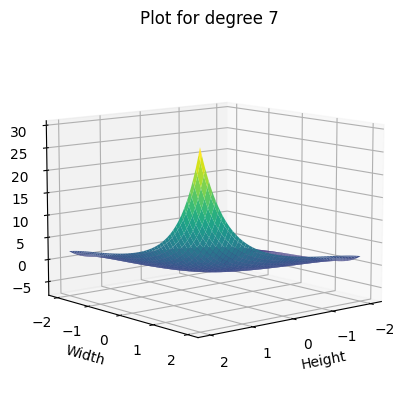

In [194]:
w, train_errs, test_errs = learn_reg_batch(train_data, test_data, 7, 10000, 0.000001, 0.6, 4)
plot_surface(w, 7)